# Anscombe's Quartet Analysis

Four datasets with nearly identical summary statistics but very different distributions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('anscombe_quartet.tsv', sep='\t')
df.head()

,dataset,x,y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33


## Descriptive Statistics

In [2]:
stats = df.groupby('dataset')[['x', 'y']].agg(['mean', 'std']).round(2)
stats.columns = ['x mean', 'x std', 'y mean', 'y std']
stats['correlation'] = df.groupby('dataset').apply(lambda g: g['x'].corr(g['y'])).round(3).values
stats['regression'] = [
    f'y = {np.polyfit(g["x"], g["y"], 1)[1]:.2f} + {np.polyfit(g["x"], g["y"], 1)[0]:.2f}x'
    for _, g in df.groupby('dataset')
]
stats

,x mean,x std,y mean,y std,correlation,regression
dataset,,,,,,
I,9.0,3.32,7.5,2.03,0.816,y = 3.00 + 0.50x
II,9.0,3.32,7.5,2.03,0.816,y = 3.00 + 0.50x
III,9.0,3.32,7.5,2.03,0.816,y = 3.00 + 0.50x
IV,9.0,3.32,7.5,2.03,0.817,y = 3.00 + 0.50x


## Plot 1 — Scatter Plots with Regression Lines

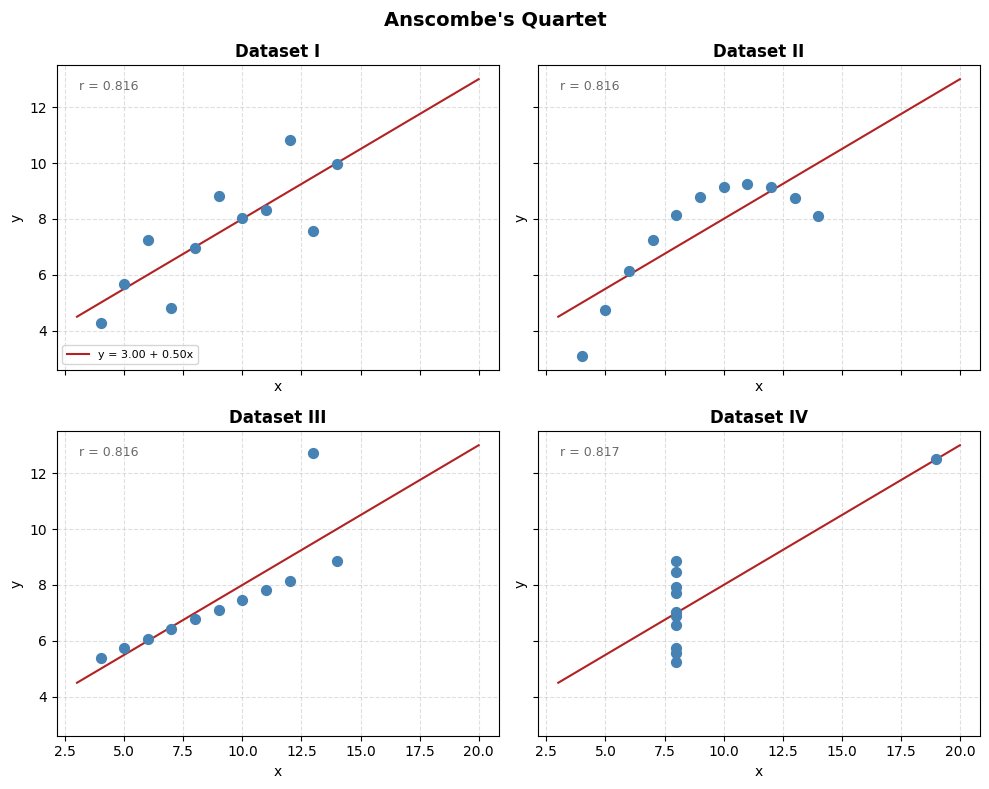

In [3]:
datasets = ['I', 'II', 'III', 'IV']
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
fig.suptitle("Anscombe's Quartet", fontsize=14, fontweight='bold')

x_line = np.linspace(3, 20, 100)
y_line = 3.00 + 0.50 * x_line  # shared regression line

for ax, name in zip(axes.flat, datasets):
    g = df[df['dataset'] == name]
    r = g['x'].corr(g['y'])
    ax.scatter(g['x'], g['y'], color='steelblue', s=50, zorder=3)
    ax.plot(x_line, y_line, color='firebrick', linewidth=1.5, label='y = 3.00 + 0.50x')
    ax.set_title(f'Dataset {name}', fontweight='bold')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.text(0.05, 0.92, f'r = {r:.3f}', transform=ax.transAxes, fontsize=9, color='dimgray')
    ax.grid(True, linestyle='--', alpha=0.4)

axes[0, 0].legend(fontsize=8)
plt.tight_layout()
plt.savefig('scatter_with_regression.png', dpi=150, bbox_inches='tight')
plt.show()

## Plot 2 — Residual Plots

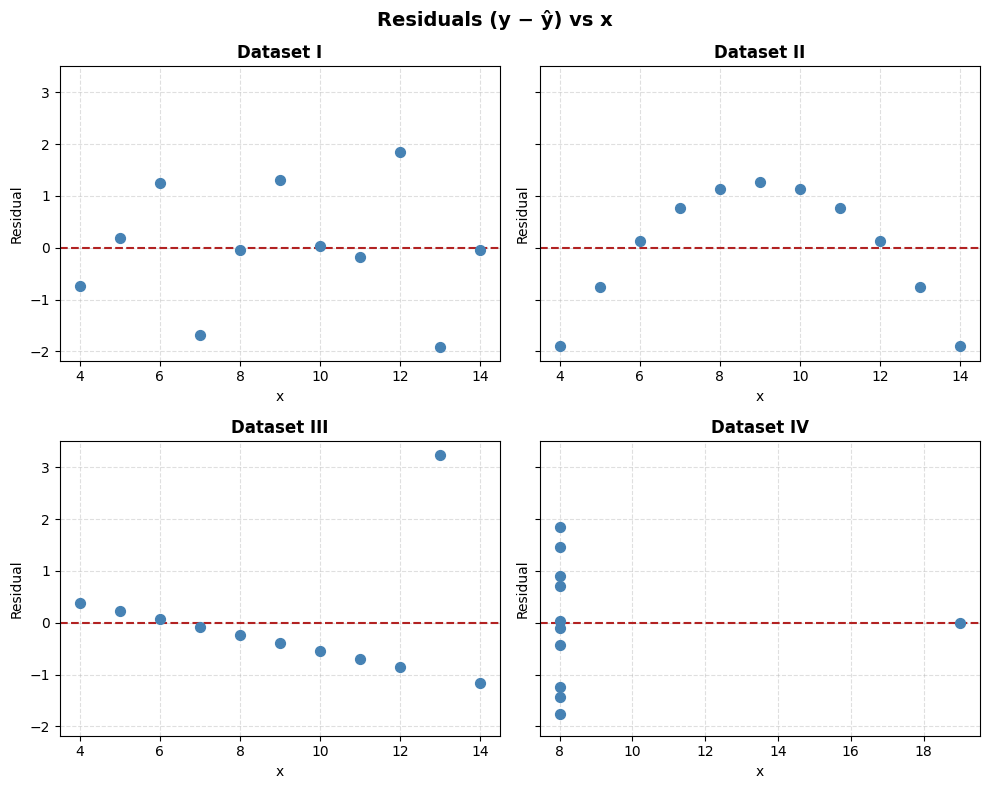

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=False, sharey=True)
fig.suptitle("Residuals (y − ŷ) vs x", fontsize=14, fontweight='bold')

for ax, name in zip(axes.flat, datasets):
    g = df[df['dataset'] == name].copy()
    g['y_hat'] = 3.00 + 0.50 * g['x']
    g['resid'] = g['y'] - g['y_hat']
    ax.scatter(g['x'], g['resid'], color='steelblue', s=50, zorder=3)
    ax.axhline(0, color='firebrick', linewidth=1.5, linestyle='--')
    ax.set_title(f'Dataset {name}', fontweight='bold')
    ax.set_xlabel('x')
    ax.set_ylabel('Residual')
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.savefig('residual_plots.png', dpi=150, bbox_inches='tight')
plt.show()